In [3]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

import os 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, filters, morphology
import cv2 as cv

# Nomer 1

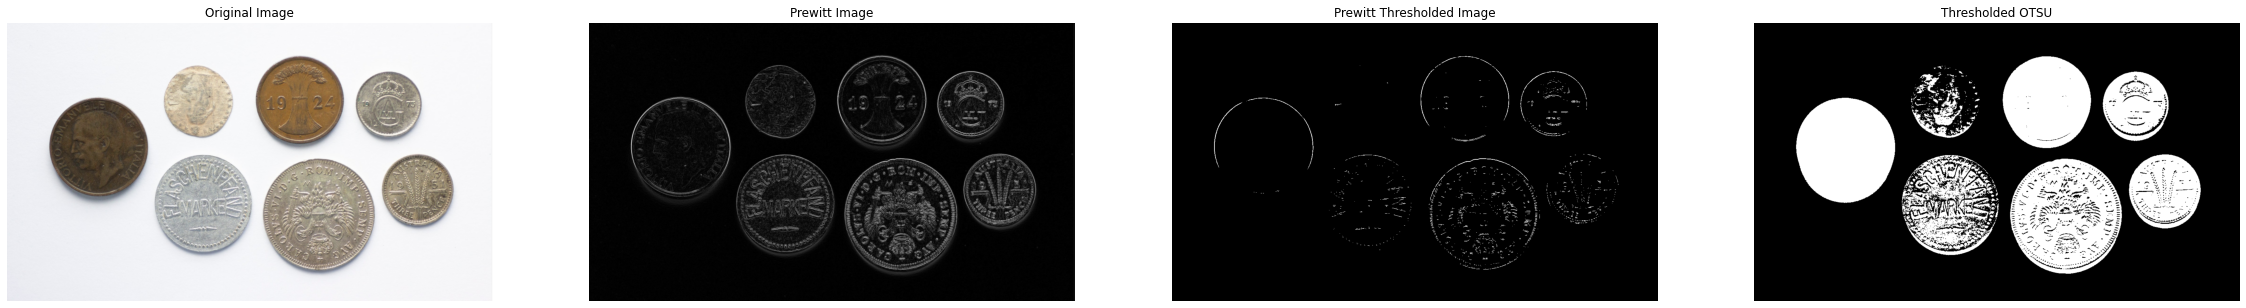

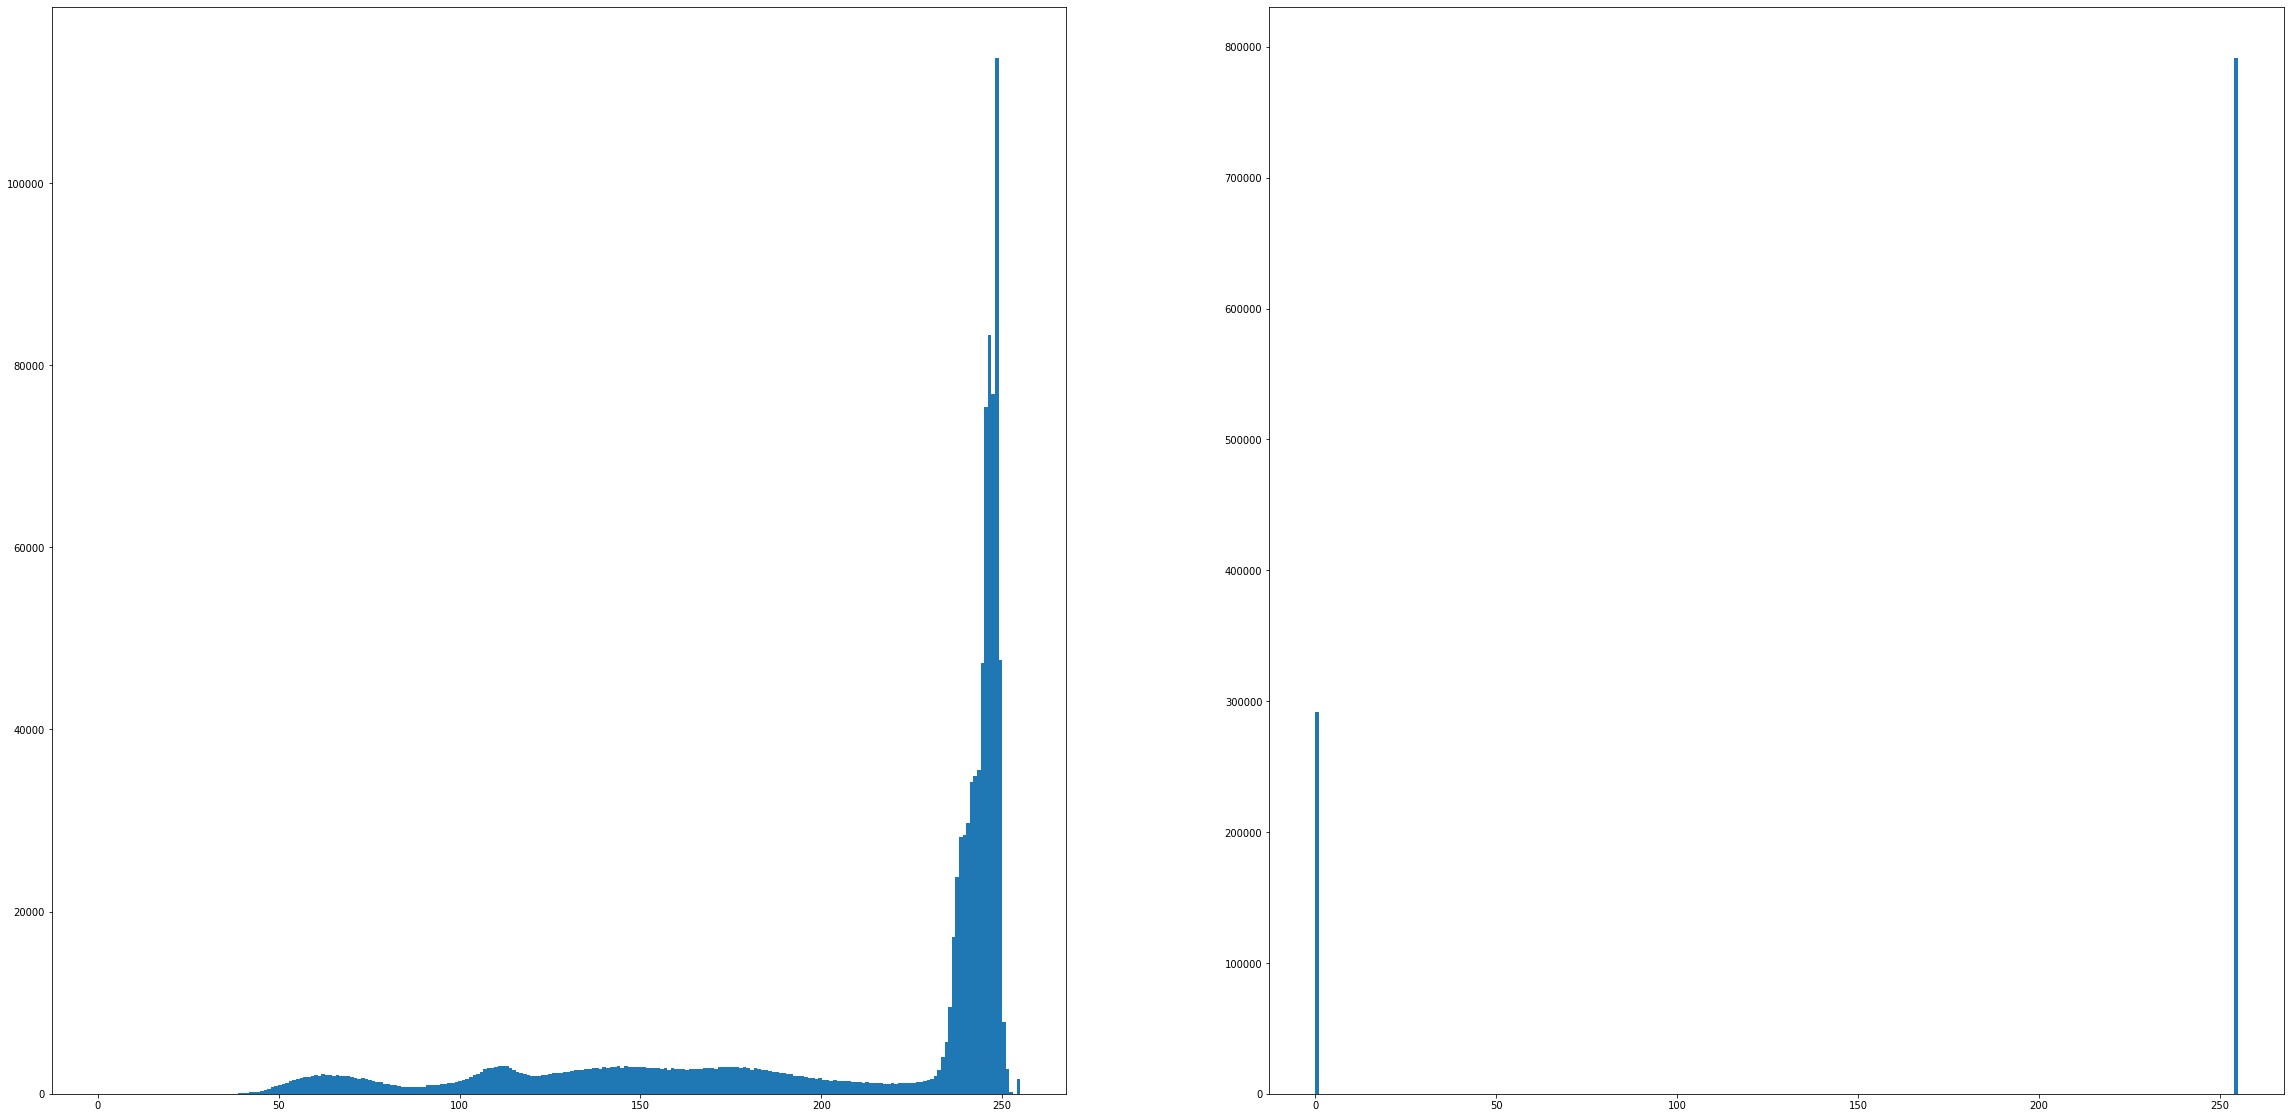

In [41]:
coins=io.imread( 'Tugas Lab 6 - Images/coins.png' )
coins_gray = color.rgb2gray(coins)
prewitt = util.img_as_ubyte(filters.prewitt(coins_gray))
_, prewitt_threshold = cv.threshold(prewitt, 50 , 255 ,cv.THRESH_BINARY)
T = filters.threshold_otsu(img_gray)
S = util.img_as_float(img_gray > T)

plt.figure(figsize=( 40 , 20 ))
# Prewitt Method Number 1
plt.subplot( 141 ),plt.imshow(coins)
plt.title( 'Original Image' );plt.axis("off")
plt.subplot( 142 ),plt.imshow(prewitt,cmap = 'gray' )
plt.title( 'Prewitt Image' );plt.axis("off")
plt.subplot( 143 ),plt.imshow(prewitt_threshold,cmap = 'gray' )
plt.title( 'Prewitt Thresholded Image' );plt.axis("off")
# OTSU Method number 2
plt.subplot(144); plt.imshow(1-S, cmap='gray')
plt.title("Thresholded OTSU"); plt.axis("off")
plt.show()

coins_gray_flatten = util.img_as_ubyte(coins_gray).flatten()
coins_gray_OTSU_flatten = util.img_as_ubyte(S).flatten()
plt.figure(figsize=( 40 , 20 ))
plt.subplot(121);
plt.hist(coins_gray_flatten,256,range=(0,255))
plt.subplot(122);
plt.hist(coins_gray_OTSU_flatten.flatten(),256,range=(0,255))
plt.show()

# Nomer 2

In [20]:
def superpixel_median_image(image, slic_labels):
## Code taken from https://stackoverflow.com/a/57746835 Turn image into superpixel image, given SLIC segment labels.
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

def superpixel_mean_image(image, slic_labels):
## Code taken from https://stackoverflow.com/a/57746835 Turn image into superpixel image, given SLIC segment labels.
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.mean(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

SLIC number-0 of segments: 6 
SLIC number-1 of segments: 34 
SLIC number-2 of segments: 66 


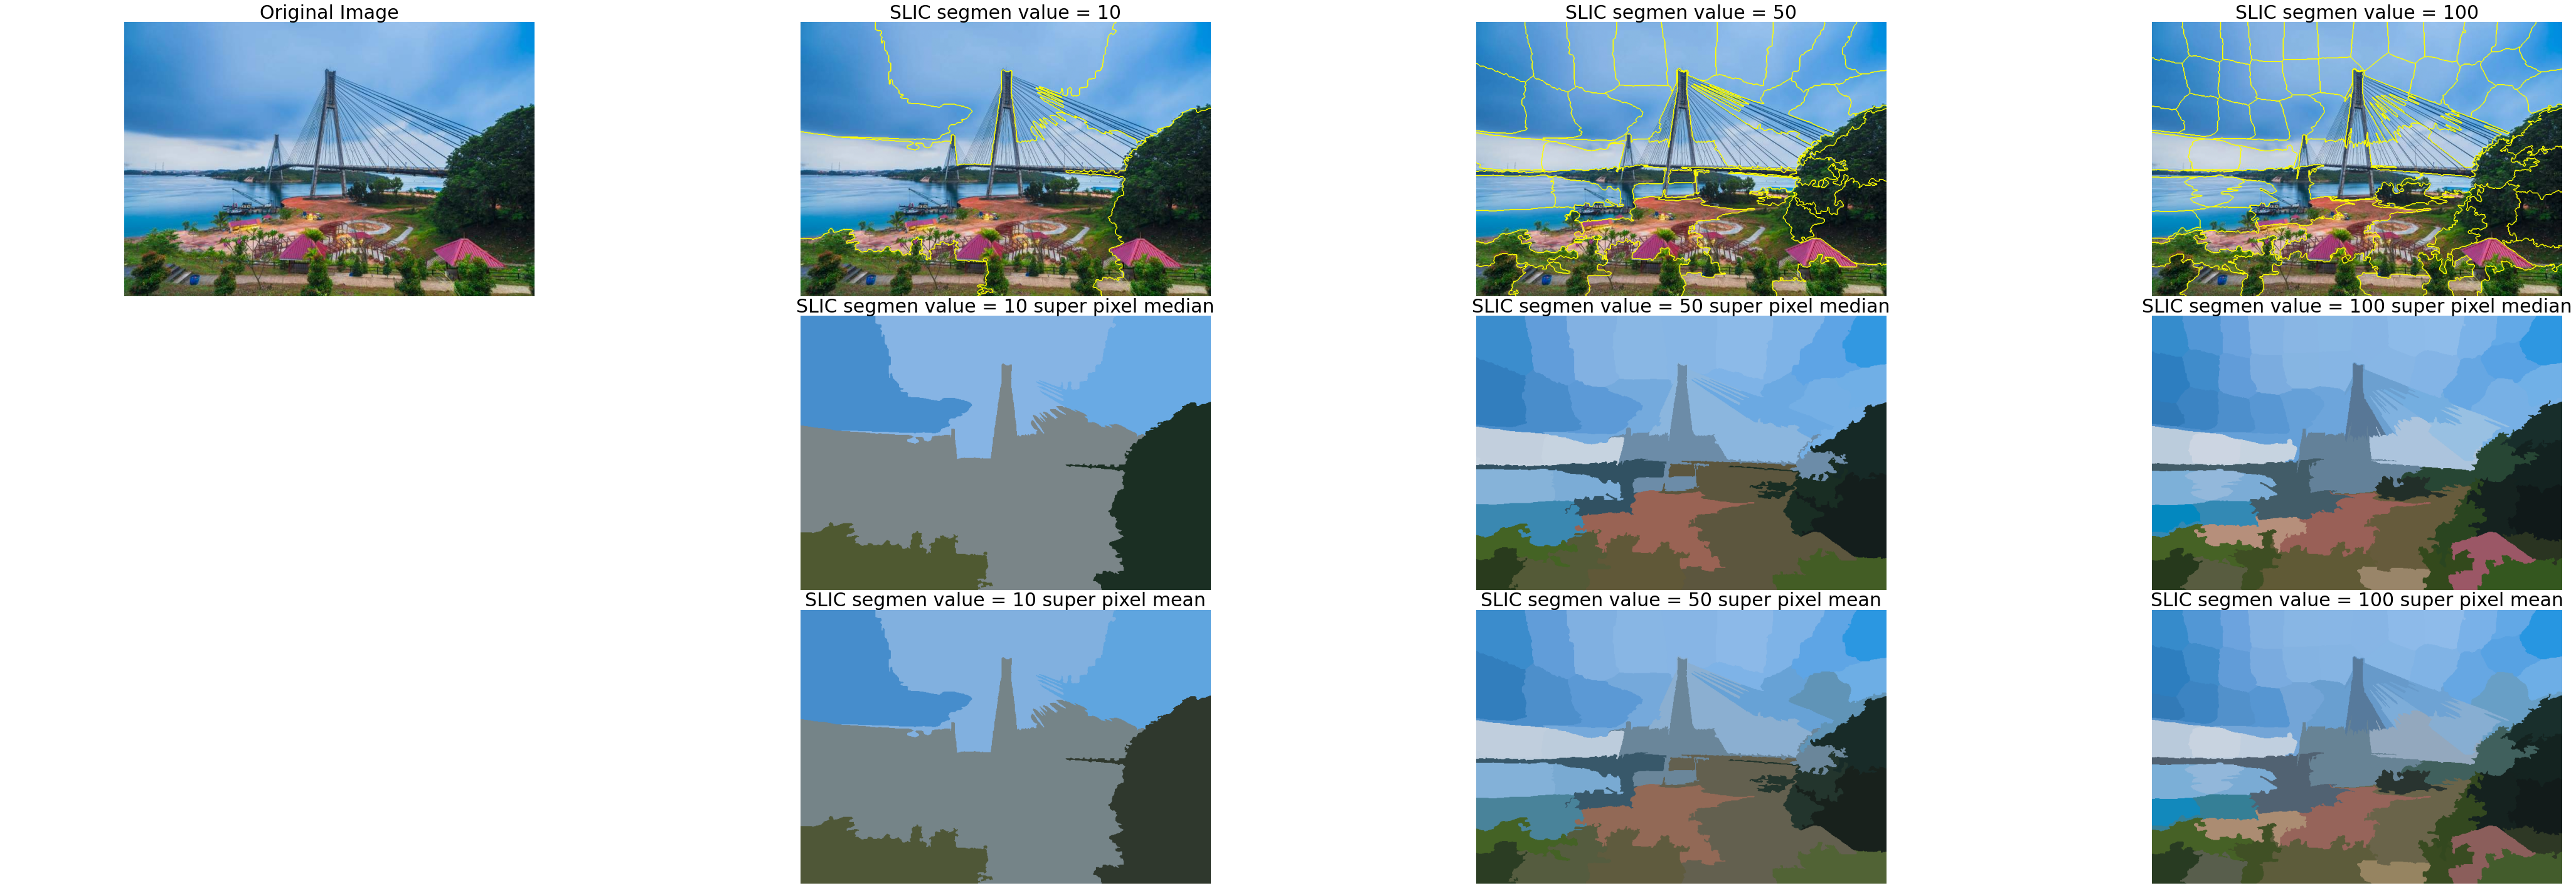

In [23]:
img = io.imread( 'Tugas Lab 6 - Images\jembatan.jpg')
segments_val = [10, 50, 100]
fig, ax = plt.subplots( 3 , len(segments_val)+1 , figsize=( 60 , 20 ))
ax[0,0].imshow(img)
ax[0,0].set_title( 'Original Image',fontsize=30)
plt.tight_layout()
for i,val in enumerate(segments_val):
    segments_slic = slic(img, n_segments= val , compactness= 10 , sigma= 1 , start_label= 1 )
    print ( f"SLIC number-{i} of segments: { len (np.unique(segments_slic))} " )  
    ax[0,i+1].imshow(mark_boundaries(img, segments_slic))
    ax[0,i+1].set_title( f'SLIC segmen value = {val}',fontsize=30)
    ax[0,i+1].set_axis_off()
    ax[1,i+1].imshow(superpixel_median_image(img,segments_slic))
    ax[1,i+1].set_title( f'SLIC segmen value = {val} super pixel median',fontsize=30)
    ax[1,i+1].set_axis_off()
    ax[2,i+1].imshow(superpixel_mean_image(img,segments_slic))
    ax[2,i+1].set_title( f'SLIC segmen value = {val} super pixel mean',fontsize=30)
    ax[2,i+1].set_axis_off()
for a in ax.flatten():
    a.set_axis_off()
plt.show()